<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?


Sí, se observan diferencias significativas entre los grupos, pues los gráficos son distintos entre sí. El primero tiene una tendencia lineal; el segundo se puede describir mejor mediante una cuadrática; el tercero también tiene tendencia lineal al igual que el cuarto.


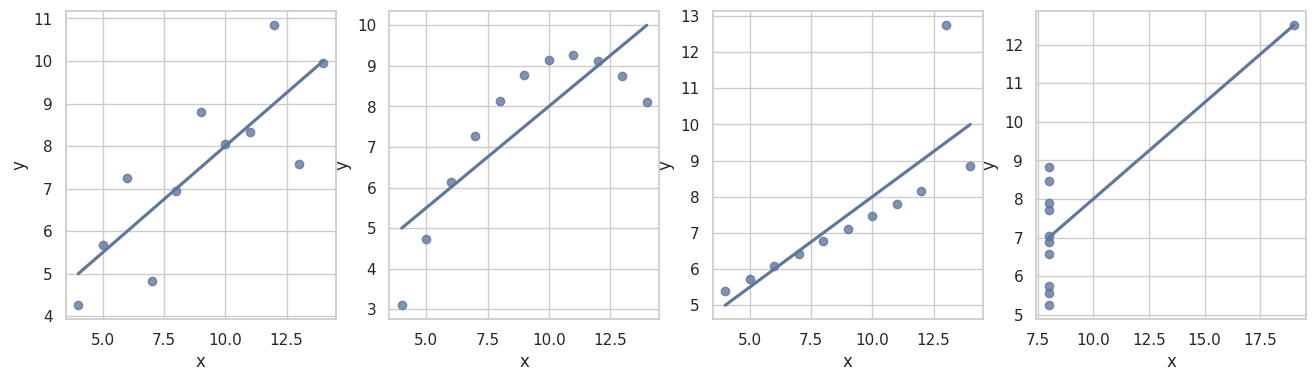

In [16]:

ds1 = data[data['dataset'] == 'I']
ds2 = data[data['dataset'] == 'II']
ds3 = data[data['dataset'] == 'III']
ds4 = data[data['dataset'] == 'IV']


fig, axs = plt.subplots(ncols=4, figsize=(16, 4))

sns.regplot(x='x', y='y', data=ds1, ax=axs[0], ci=None)
sns.regplot(x='x', y='y', data=ds2, ax=axs[1], ci=None)
sns.regplot(x='x', y='y', data=ds3, ax=axs[2], ci=None)
sns.regplot(x='x', y='y', data=ds4, ax=axs[3], ci=None)

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
plt.plot()
print("Sí, se observan diferencias significativas entre los grupos, pues los gráficos son distintos entre sí. El primero tiene una tendencia lineal; el segundo se puede describir mejor mediante una cuadrática; el tercero también tiene tendencia lineal al igual que el cuarto.")

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.



In [18]:
grupos = ['I','II','III','IV']
for grupo in grupos:
  print('Grupo',grupo+':')
  display(data[data['dataset']==grupo].describe())
print("Observemos que la media y la desviación estándar son idénticas para los cuatro conjuntos. Sin embargo, el valor mínimo de los datos en el eje x en el cuarto grupo es el doble del de los otros grupos. En cuanto al eje y, los valores varían en todos los casos. El cuarto grupo presenta consistencia en los percentiles mínimos, 25%, 50%, y 75%, aunque su máximo es diferente. Esto se refleja en el gráfico, donde se distingue un punto atípico en este grupo. Los otros tres conjuntos comparten el mismo mínimo, máximo y cuartiles en los datos en el eje x.")

Grupo I:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


Grupo II:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


Grupo III:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


Grupo IV:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Observemos que la media y la desviación estándar son idénticas para los cuatro conjuntos. Sin embargo, el valor mínimo de los datos en el eje x en el cuarto grupo es el doble del de los otros grupos. En cuanto al eje y, los valores varían en todos los casos. El cuarto grupo presenta consistencia en los percentiles mínimos, 25%, 50%, y 75%, aunque su máximo es diferente. Esto se refleja en el gráfico, donde se distingue un punto atípico en este grupo. Los otros tres conjuntos comparten el mismo mínimo, máximo y cuartiles en los datos en el eje x.


3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Group: I
MSE:  1.2511536363636366
R2:   0.6665424595087748 

Group: II
MSE:  1.2523900826446281
R2:   0.6662420337274844 

Group: III
MSE:  1.2505628925619836
R2:   0.6663240410665592 

Group: IV
MSE:  1.249317272727273
R2:   0.6667072568984653 



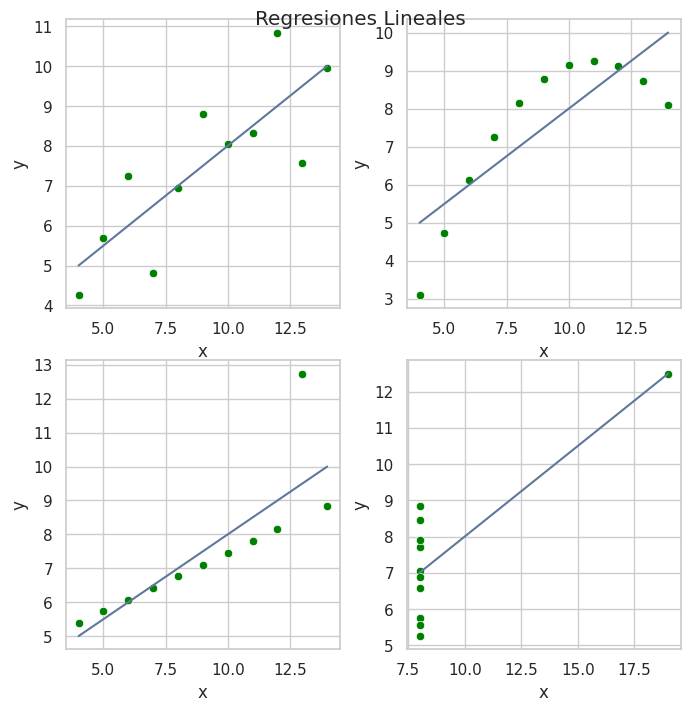

In [6]:
data_types = ['I', 'II', 'III', 'IV']
fig, axes = plt.subplots(figsize=(7,7), nrows=2, ncols=2)
fig.tight_layout()
fig.suptitle('Regresiones Lineales')

for i, t in enumerate(data_types):
    X = data[data['dataset']==t]['x'].to_numpy().reshape(-1,1)
    y = data[data['dataset']==t]['y'].to_numpy().reshape(-1,1)

    model = LinearRegression().fit(X,y)
    y_pred = model.predict(X).reshape(1,-1)[0]
    pred = pd.DataFrame({'set': t ,'x': X.reshape(1,-1)[0], 'y_pred': y_pred})
    print('Group:', t)
    print('MSE: ', mean_squared_error(y, y_pred))
    print('R2:  ', r2_score(y, y_pred), '\n')


    sns.scatterplot(data=data[data['dataset']==t], x='x', y='y', ax=axes[i//2,i%2], color='green')
    sns.lineplot(data=pred, x='x', y='y_pred', ax=axes[i//2,i%2])

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

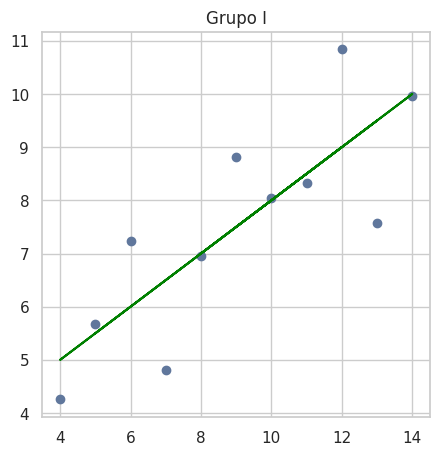

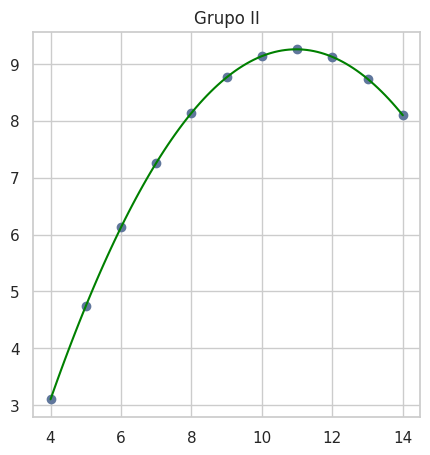

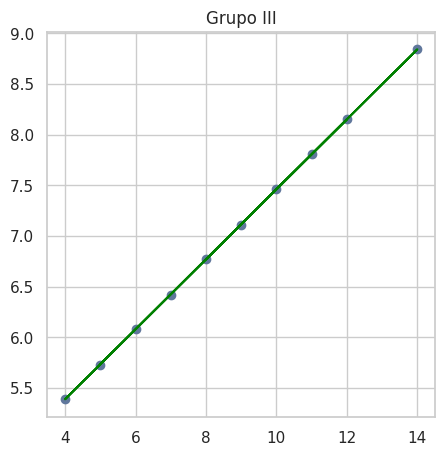

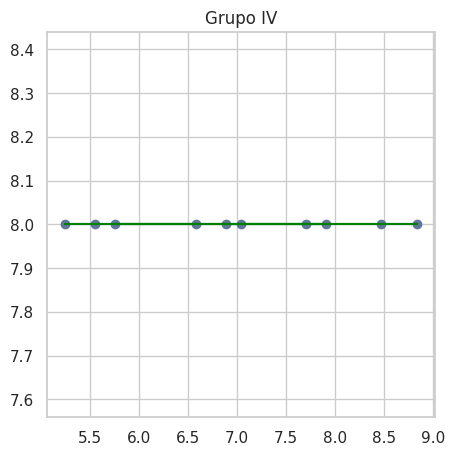

In [12]:

# Grupo I
fig, axs = plt.subplots(figsize=(5,5))
X1 = ds1[['x']]
y1 = ds1['y']

group1 = LinearRegression()
group1.fit(X1, y1)

y_hat1 = group1.predict(X1)

plt.scatter(X1, y1)
plt.plot(X1, y_hat1, color = 'green');
plt.title('Grupo I')


# Grupo II
fig, axs = plt.subplots(figsize=(5,5))
X2 = ds2['x']
y2 = ds2['y']

coeffs = np.polyfit(X2, y2, 2)
poly = np.poly1d(coeffs)

plt.scatter(X2, y2)
x = np.linspace(np.min(X2), np.max(X2), 100)
plt.plot(x, poly(x), color = 'green');
plt.title('Grupo II')


# Grupo III
fig, axs = plt.subplots(figsize=(5,5))
ds3_new = ds3[ds3['y'] < 10]

X3 = ds3_new[['x']]
y3 = ds3_new['y']

group3 = LinearRegression()
group3.fit(X3, y3)

y_hat3 = group3.predict(X3)

plt.scatter(X3, y3)
plt.plot(X3, y_hat3, color = 'green');
plt.title('Grupo III')


# Grupo IV
fig, axs = plt.subplots(figsize=(5,5))
ds4_new = ds4[ds4['y'] < 10]

X4 = ds4_new[['y']]
y4 = ds4_new['x']

group4 = LinearRegression()
group4.fit(X4, y4)
y_hat4 = group4.predict(X4)

plt.scatter(X4, y4)
plt.plot(X4, y_hat4, color = 'green');
plt.title('Grupo IV')
plt.show()